In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mlhandmade.kernel_methods import (
    SupportVectorClassifier,
    SupportVectorRegressor,
    KernelRidge
)
from mlhandmade.multiclass import OVR, OVO
from mlhandmade.preprocessing import (
    standardize,
    binary,
    ordinal
)
from mlhandmade.plotting import(
    plot_decision_regions,
    scatter_plot,
)

In [2]:
iris = pd.read_csv("../datasets/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


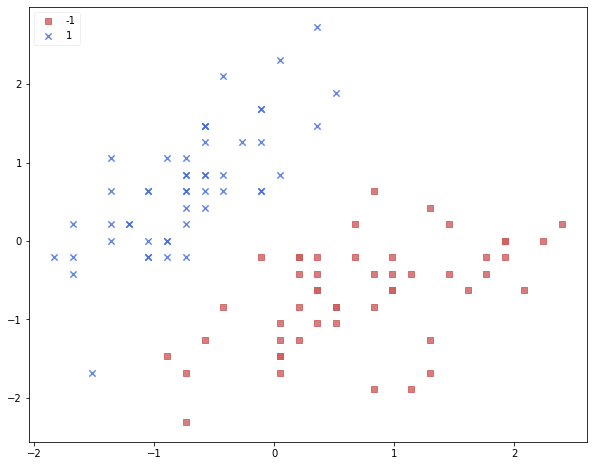

In [3]:
X = iris.iloc[:100, [0, 1]].values
y = iris.iloc[:100, -1].values

X = standardize(X)
y = binary(y)
fig = plt.figure(figsize=(10,8))
ax = scatter_plot(X, y, legend=2)

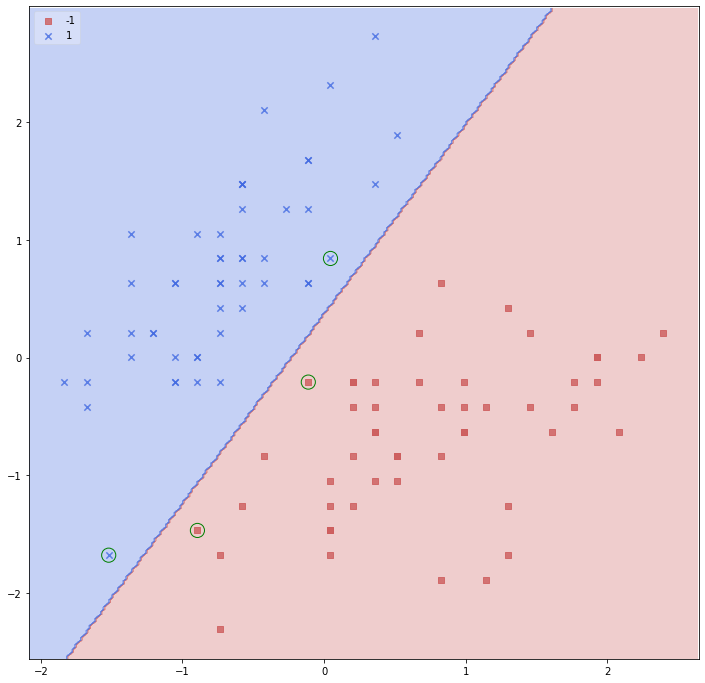

CPU times: total: 109 ms
Wall time: 130 ms


In [4]:
%%time
fig = plt.figure(figsize=(12,12))
model = SupportVectorClassifier(kernel="linear")
model.fit(X, y)
ax = plot_decision_regions(X=X, y=y, classifier=model, legend=2)
ax.scatter(model.X[:, 0], model.X[:, 1], s=200, facecolor="none", edgecolor="g")
plt.show()

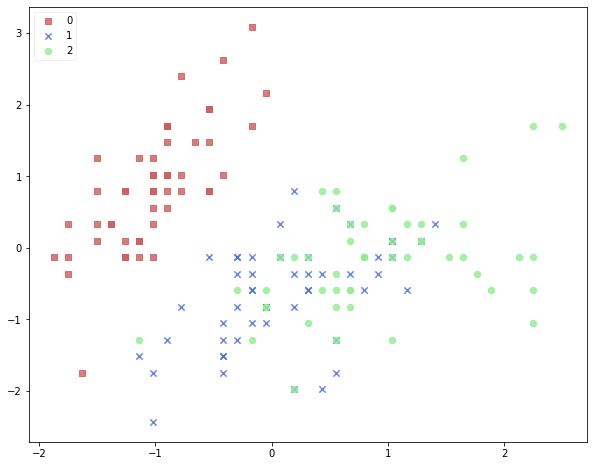

In [5]:
X = iris.iloc[:, [0, 1]].values
y = iris.iloc[:, -1].values

X = standardize(X)
y = ordinal(y)
fig = plt.figure(figsize=(10,8))
ax = scatter_plot(X, y, legend=2)
plt.show()

In [6]:
model = SupportVectorClassifier(kernel="rbf", C=1.0, gamma=0.7)

TypeError: __init__() got an unexpected keyword argument 'gamma'

CPU times: total: 641 ms
Wall time: 645 ms


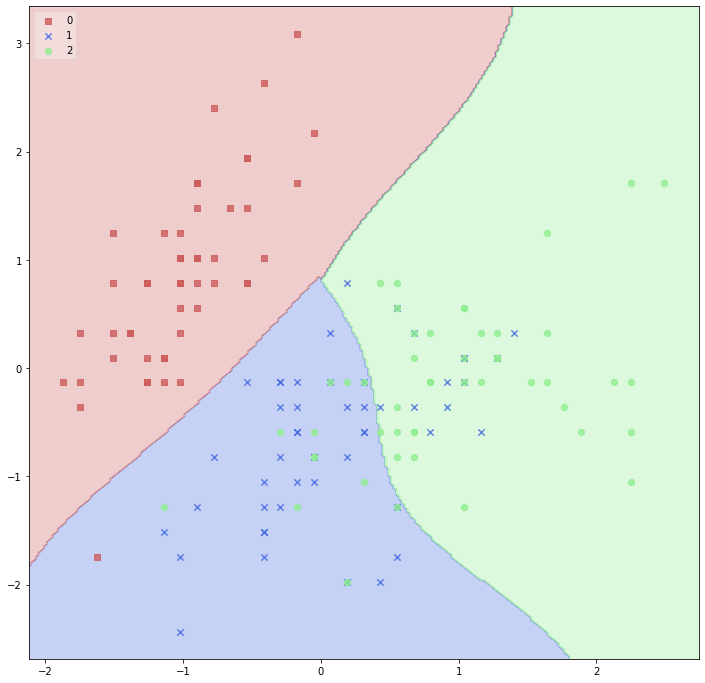

In [ ]:
%%time
fig = plt.figure(figsize=(12,12))
ovo = OVO(model)
ovo.fit(X, y)
ax = plot_decision_regions(X=X, y=y, classifier=ovo, legend=2)

CPU times: total: 1.17 s
Wall time: 1.18 s


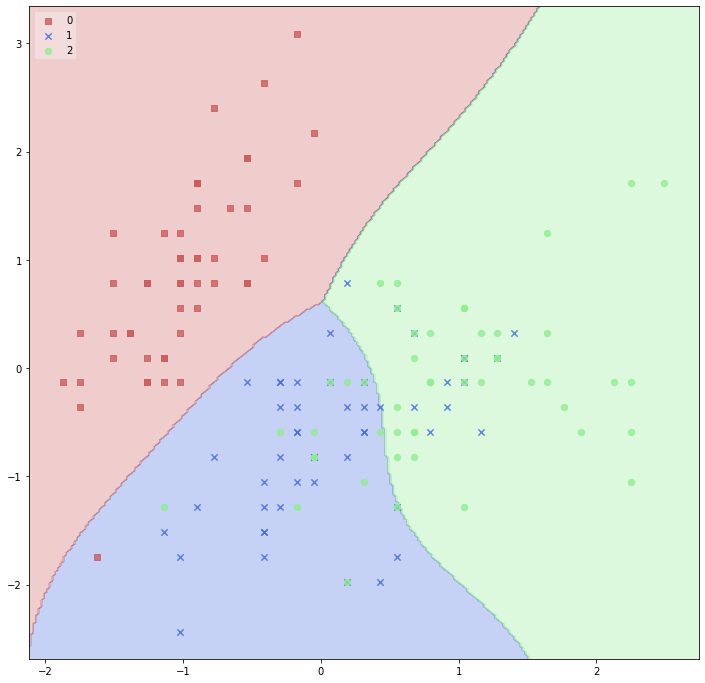

In [ ]:
%%time
fig = plt.figure(figsize=(12,12))
ovr = OVR(model)
ovr.fit(X, y)
ax = plot_decision_regions(X=X, y=y, classifier=ovr, legend=2)

In [ ]:
np.random.seed(1)
X = np.sort(5 * np.random.rand(20, 1), axis=0)
T = np.linspace(X[0, 0], X[-1, 0], 500)[:, np.newaxis]
y = 2 * np.ravel(np.sin(2 * X))

y[::2] += 0.2 * (0.5 - np.random.rand(10))

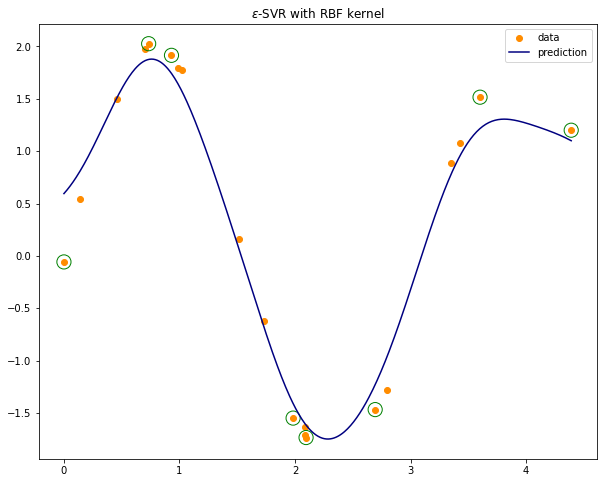

In [ ]:
fig = plt.figure(figsize=(10,8))
model = SupportVectorRegressor(kernel="rbf", gamma=2.0)
model.fit(X, y)

y_ = model.predict(T)

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.scatter(model.X, model.y, s=200, facecolor="none", edgecolor="g")
plt.axis("tight")
plt.legend()
plt.title(r"$\epsilon$-SVR with RBF kernel")
plt.show()

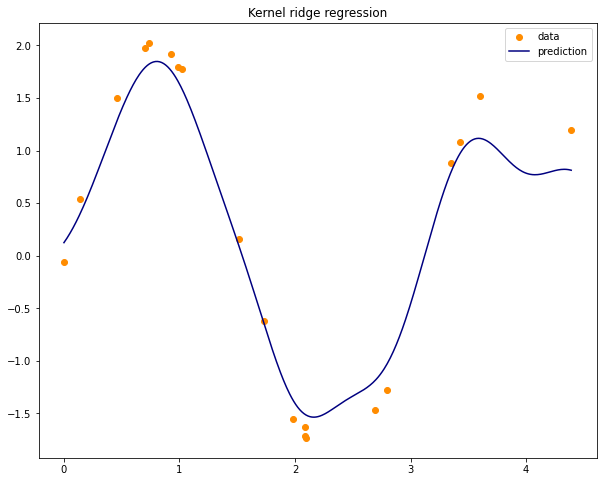

In [ ]:
fig = plt.figure(figsize=(10,8))
model = KernelRidge(kernel="rbf", gamma=5.0)
model.fit(X, y)

y_ = model.predict(T)

plt.scatter(X, y, color="darkorange", label="data")
plt.plot(T, y_, color="navy", label="prediction")
plt.axis("tight")
plt.legend()
plt.title("Kernel ridge regression")
plt.show()